<a href="https://colab.research.google.com/github/NguyenQuangHuy2001/AI_CNN/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Khai báo thư viện

In [ ]:
from keras.models import Sequential
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from random import randint
from skimage import color 

from keras.layers import Conv2D,Activation, Dropout,MaxPooling2D,Dense,Flatten

Load dữ liệu

In [ ]:
#khai bao du lieu
(x_train,y_train) , (x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


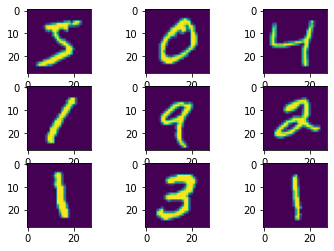

In [ ]:
#ve hinh
X=x_test
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train[i])
plt.show()

Xử lý dữ liệu

In [ ]:
#chuyen ve so thuc
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
#xu li du lieu 
x_train/=255
x_test/=255
#one hot encoding
y_train = to_categorical(y_train,10)
y_test = to_categorical(y_test,10)

Tạo model

In [ ]:
# MODEL CNN
model = Sequential()
# BLOCK 1
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same' ,input_shape =(28,28,1)))
model.add(Conv2D(32,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(64,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# BLOCK 2
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(Conv2D(128,(3,3), activation='relu',kernel_initializer = 'he_uniform', padding ='same'))
model.add(MaxPooling2D(2,2))

# Add ANN
model.add(Flatten())
model.add(Dense(128,activation = 'relu', kernel_initializer = 'he_uniform'))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                    

Training model

In [ ]:
opt = SGD(lr= 0.01, momentum = 0.9)

model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

history = model.fit(x_train, y_train, epochs = 20, batch_size = 128, validation_data = (x_test,y_test), verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/20
469/469 [==============================] - 25s 29ms/step - loss: 0.2297 - accuracy: 0.9275 - val_loss: 0.0587 - val_accuracy: 0.9817
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0425 - accuracy: 0.9871 - val_loss: 0.0376 - val_accuracy: 0.9882
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 0.0295 - accuracy: 0.9909 - val_loss: 0.0347 - val_accuracy: 0.9892
Epoch 4/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0212 - accuracy: 0.9934 - val_loss: 0.0250 - val_accuracy: 0.9922
Epoch 5/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0151 - accuracy: 0.9951 - val_loss: 0.0274 - val_accuracy: 0.9917
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0109 - accuracy: 0.9965 - val_loss: 0.0306 - val_accuracy: 0.9910
Epoch 7/20
469/469 [==============================] - 12s 25ms/step - loss: 0.0082 - accuracy: 0.9972 - val_loss: 0.0307 - val_accuracy:

Lưu model

In [ ]:
model.save('CNN_Mnist.h5')

Vẽ đồ thị dộ chính xác

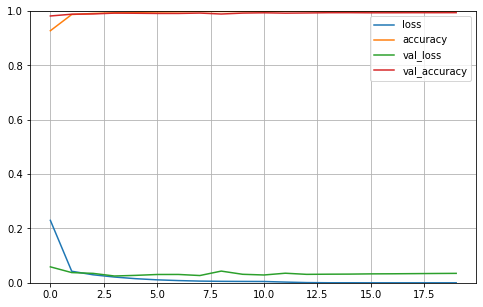

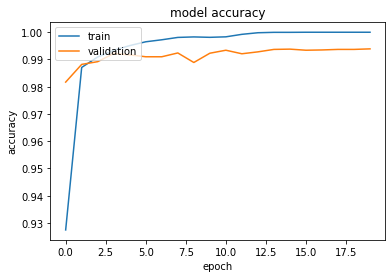

In [ ]:
#ve do thi
pd.DataFrame(history.history).plot(figsize= (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc = 'upper left')
plt.show()